## Linear Regression이란?

#### <span style="color:red">딥러닝의 딥은 통계의 결과들이 무수히 얽혀있는 즉 연산들이 복잡하다는 뜻의 Deep이다.</span>
<span style="color:red">이 연산중에서 가장 기본이 되는 연산이 바로 Linear Regression 선형회귀다.</span>
여기서는 과연 선형회귀가 어떤 것인지 차근차근 살펴보겠다

학생들과 성적의 관계
학생들마다 다 다양한 성적 분포를 가지는데...여기에 어떤 연관이 있는지 알아내고
그 연관 관계를 이용해서 결국에는 특정학생의 성적을 예측해보자.
학생들의 기말고사 성적은 [      ]에 따라 다르다

[     ]안에 시험성적을 좌우할 만한 요소들로 무엇이 있을까?
여기서 [     ]안에 들어갈 내용을 '정보'라 한다. 머신러닝과 딥러닝은 이 정보가 필요하다. 
정보를 정확히 준비해 놓기만 하면 성적을 예측하는 방정식을 만들수 있다.

이것을 수학적으로 정의하면, 성적을 변하게 하는 '정보' 요소를 X라 하고, 이 값에 따라 변하는 '성적'을 Y라 한다. 'X값이 변함에 따라 Y값도 변한다'는 정의 안에서 독립적으로 변할수 있는 값 X를 독립변수라 한다.
또한, 이 독립 변수에 따라 종속적으로 변하는 Y를 종속변수라 한다.
<span style="color:red">선형회귀는 독립변수 X를 이용해서 종속변수 Y를 예측하고 설명하는 작업을 말한다.</span>

### 예측선 그리기

기말고사를 준비하는 학생들을 대상으로 자료를 조사한 결과를 바탕으로 공부한 시간을 통해서 시험성적을 예측하자. <br/>
     X = [2,  4,  6,  8] <br/> 
     Y = [81, 93, 91, 97]

In [4]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

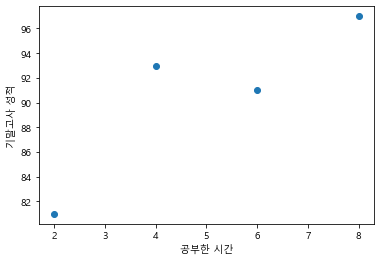

In [5]:
X = [2, 4, 6, 8] # 공부시간 
Y = [81, 93, 91, 97] # 점수

plt.scatter(X,Y)
plt.xlabel('공부한 시간')
plt.ylabel('기말고사 성적')
plt.show()

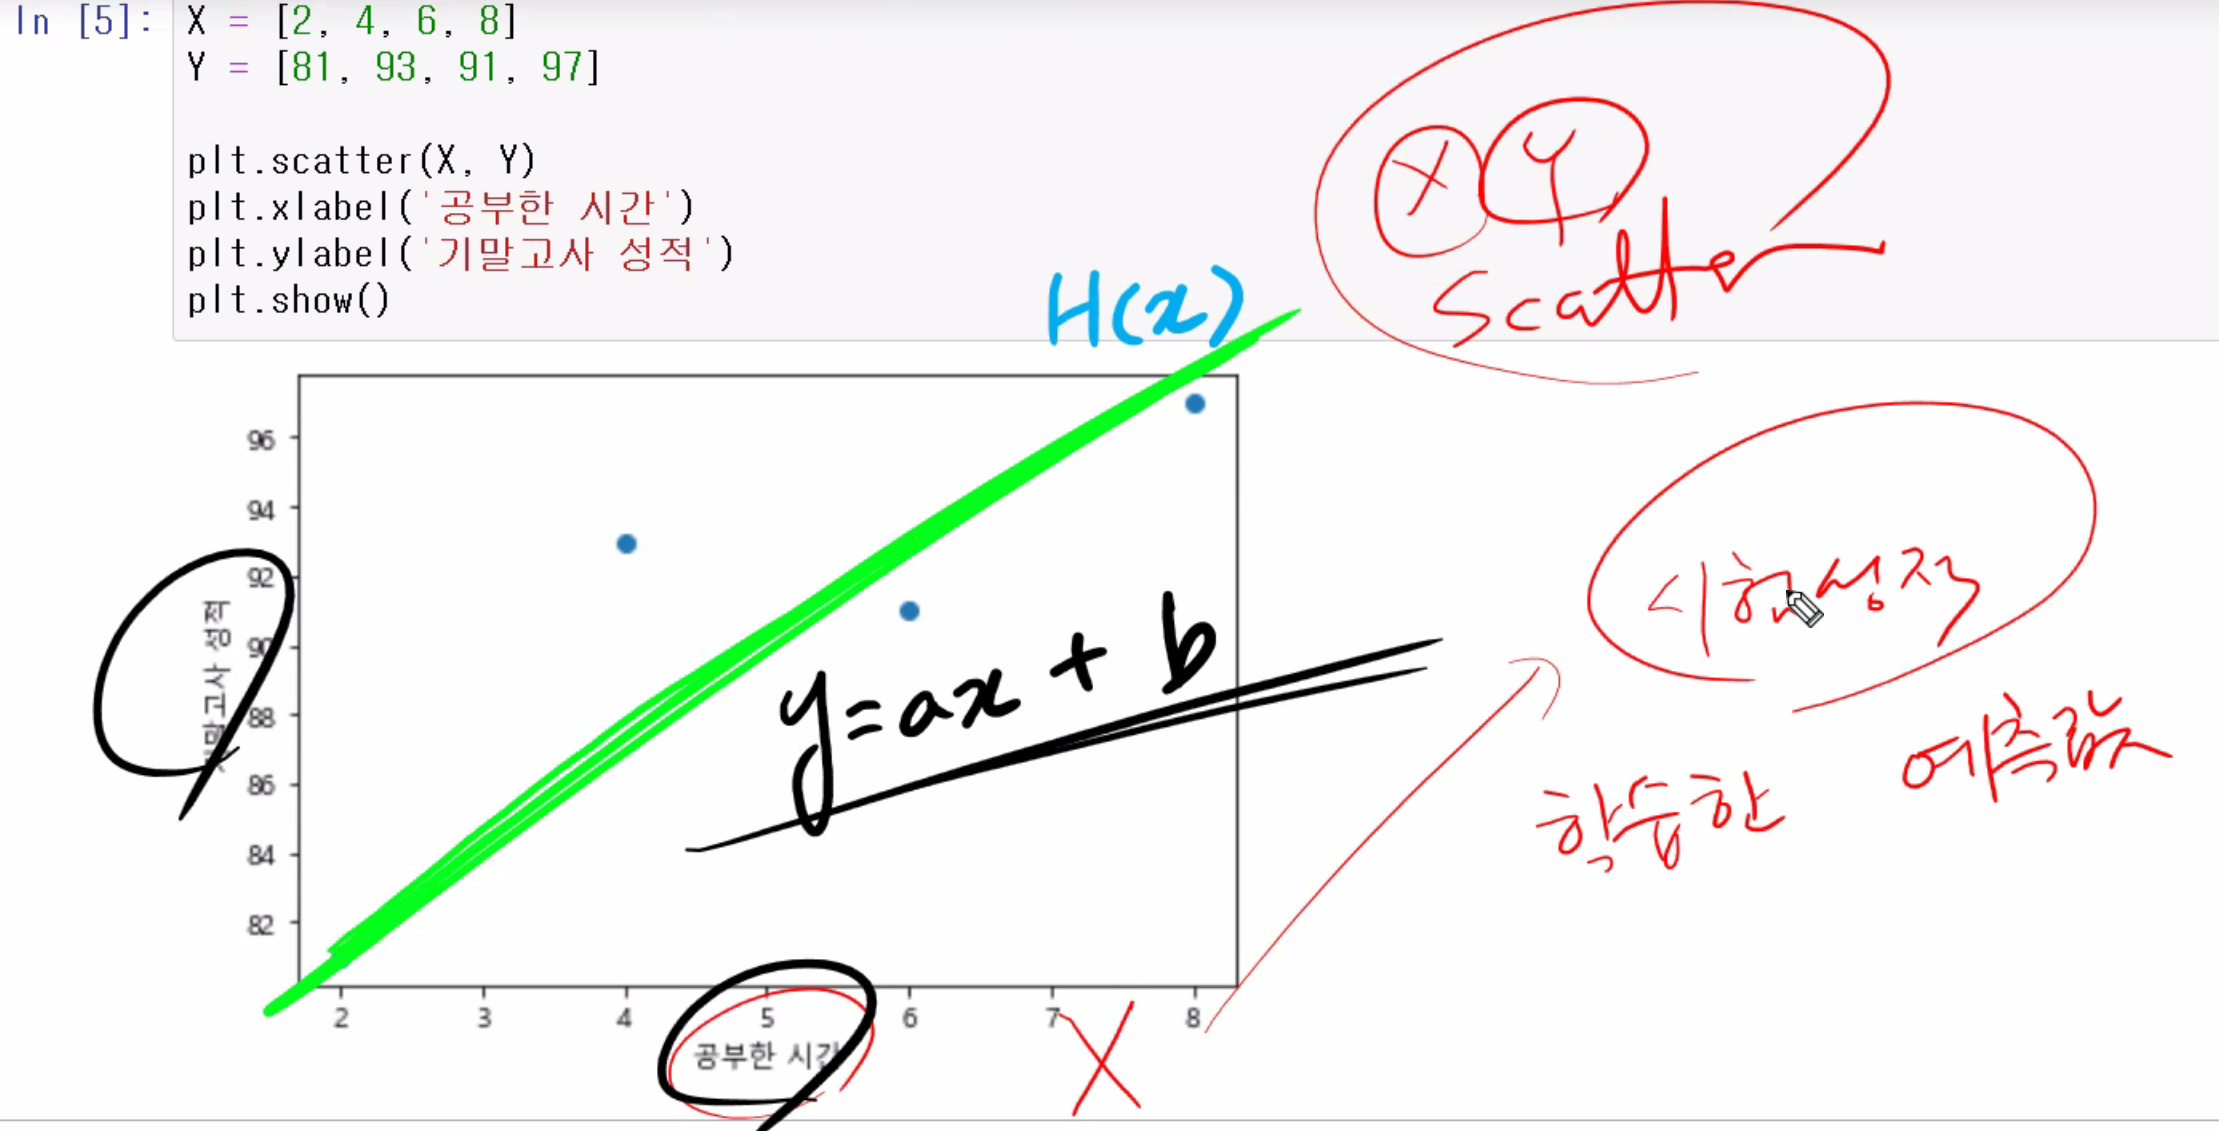

왼쪽이 아래로 향하고 오른쪽이 위를 향하는 선형(직선으로 표시되는 형태의 그래프)을 보인다. 선형회귀는 이 점들의 특징을 가장 잘 나타내는 선을 그리는 과정이다.  여기서 선은 곧 일차함수 그래프이며 다음과 같은 공식으로 표현된다.<br>
      <span style="color:red">y = ax + b</span>
      <br>
여기서 x값은 독립변수이고 y값은 종속변수이다. 즉, x 값에 따라서 y값은 반드시 달라진다. 다만, 정확하게 계산하려면 상수 a와 b의 값을 알아야한다.<br>

따라서 선형회귀문제(Linear Regression)는 결과적으로 a와 b값을 알아내는 문제이다.

### 최소제곱법
    일차함수의 기울기 a와 절편 b를 구할수 있다
    
    a = (x-x평균)(y-y평균)의 합 / (x-x평균)**의 합
    b = y의 평균-(x의 평균x기울기a)
    
    a = 2.3    b = 79

### <span style="color:red"><center>y = 2.3x + 79</center></span>

    위의 최소제곱법 공식을 가지고
    기울기 a와 y의 절편 b를 구해보겠다.
    주어진 X의 모든 원소의 값 평균을 구하는 함수는 mean()함수를 사용하겠다.

In [11]:
# x의 평균
mx = np.mean(X)

# y의 평균
my = np.mean(Y)

# (x-x평균)**의 합
divisor = sum([(i-mx)**2 for i in X])

# (x-x평균)(y-y평균)의 합
def top(X, mx, Y, my):
    d = 0
    for i in range(len(X)):
        d += (X[i]-mx) * (Y[i]-my)
    return d

# (x-x평균)(y-y평균)의 합 / (x-x평균)**의 합
dividend = top(X, mx, Y, my)
a = dividend / divisor
print(a)

# y의 평균-(x의 평균x기울기a)
b = my-(mx*a)
print(b)

2.3
79.0


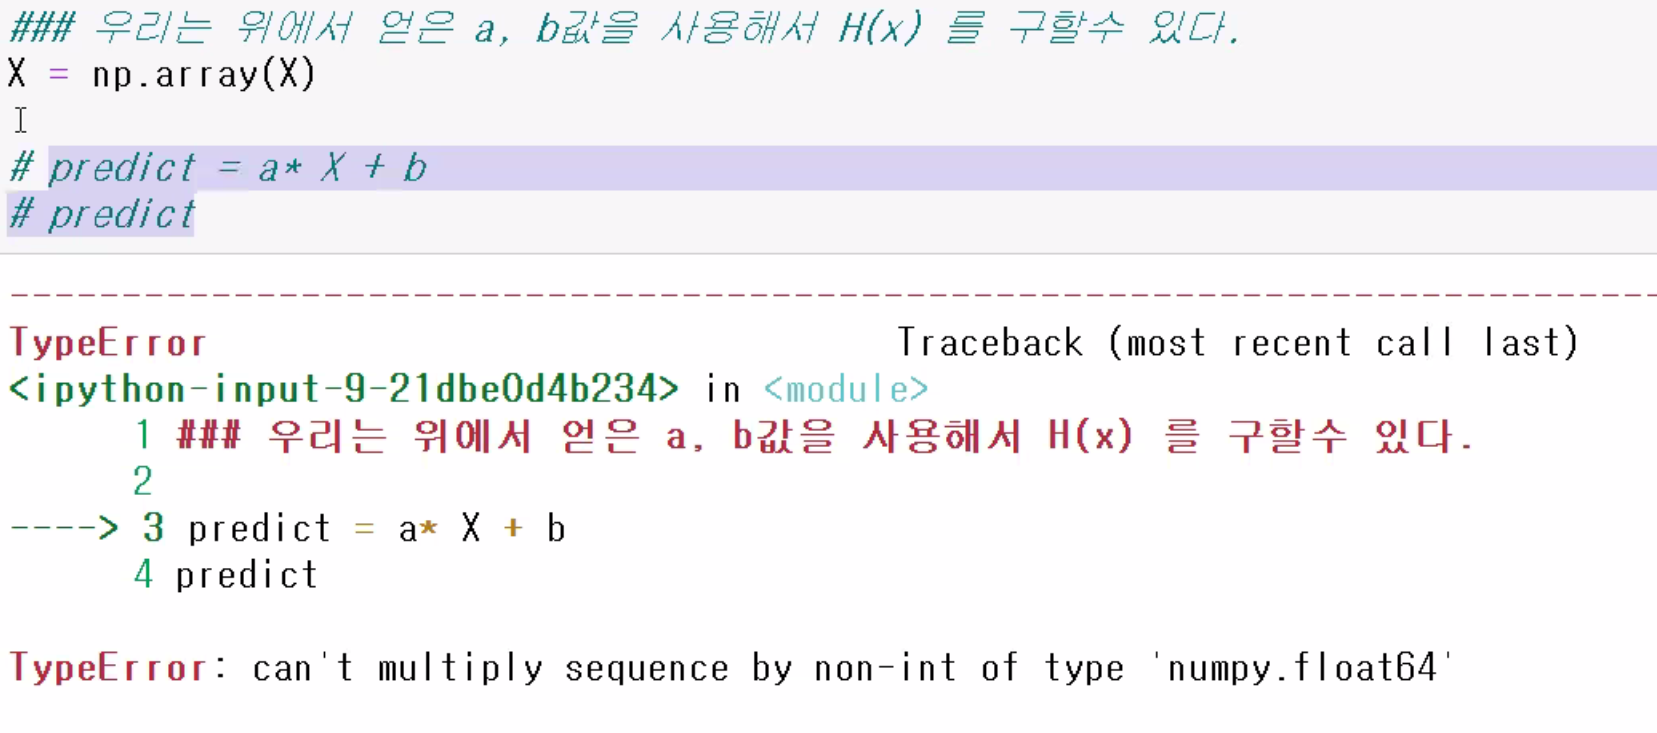

In [12]:
# 넘파이 배열로 변경해서 넣어줘야 한다.
X = np.array(X)
Y = np.array(Y)
predict = a*X+b
predict

array([83.6, 88.2, 92.8, 97.4])

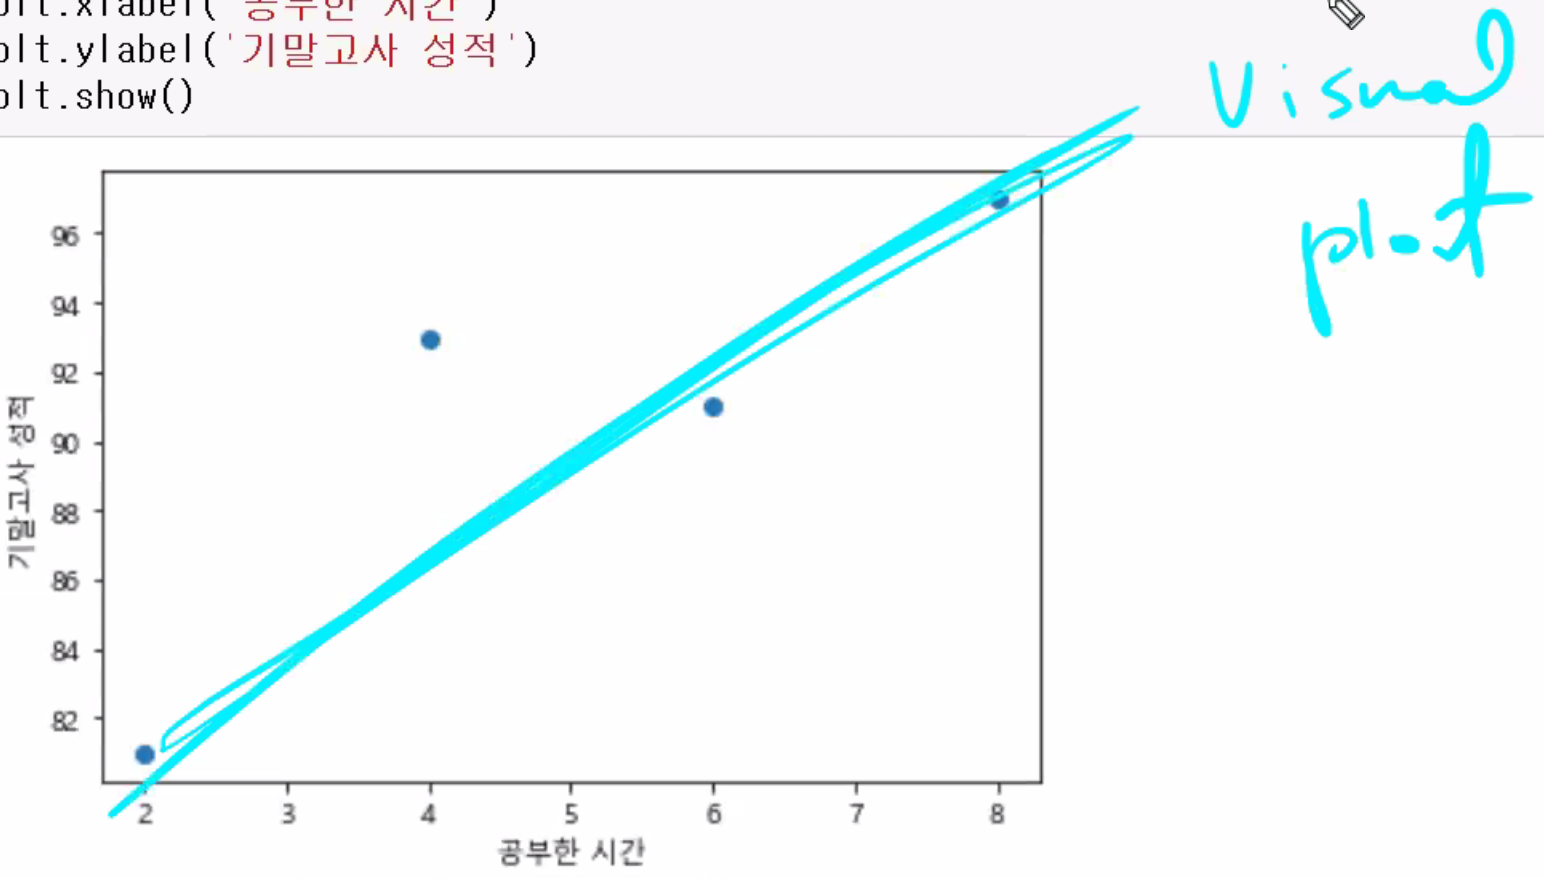  
위의 값을 plot해주면 위 사진과 같이 선형 분포도가 나와야 한다.

### X,Y값을 가장 잘 예측하는 선형을 그려보자,,,
#### 위에서의 최소제곱근의 결과로 나온 a,b를 활용한 H(x)=wX+b 선형그래프를 구하자

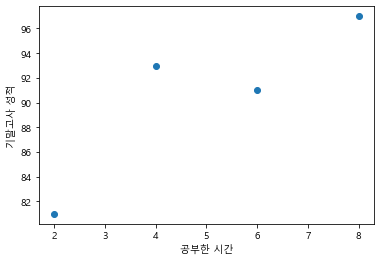

In [13]:
plt.scatter(X,Y)
plt.xlabel('공부한 시간')
plt.ylabel('기말고사 성적')
plt.show()

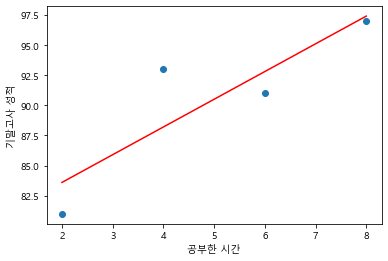

In [14]:
plt.scatter(X,Y)
plt.plot(X, predict, c='r')
plt.xlabel('공부한 시간')
plt.ylabel('기말고사 성적')
plt.show()

### 정량화를 통해서 잘 확인해봐야 한다.  
loss function(cost function)
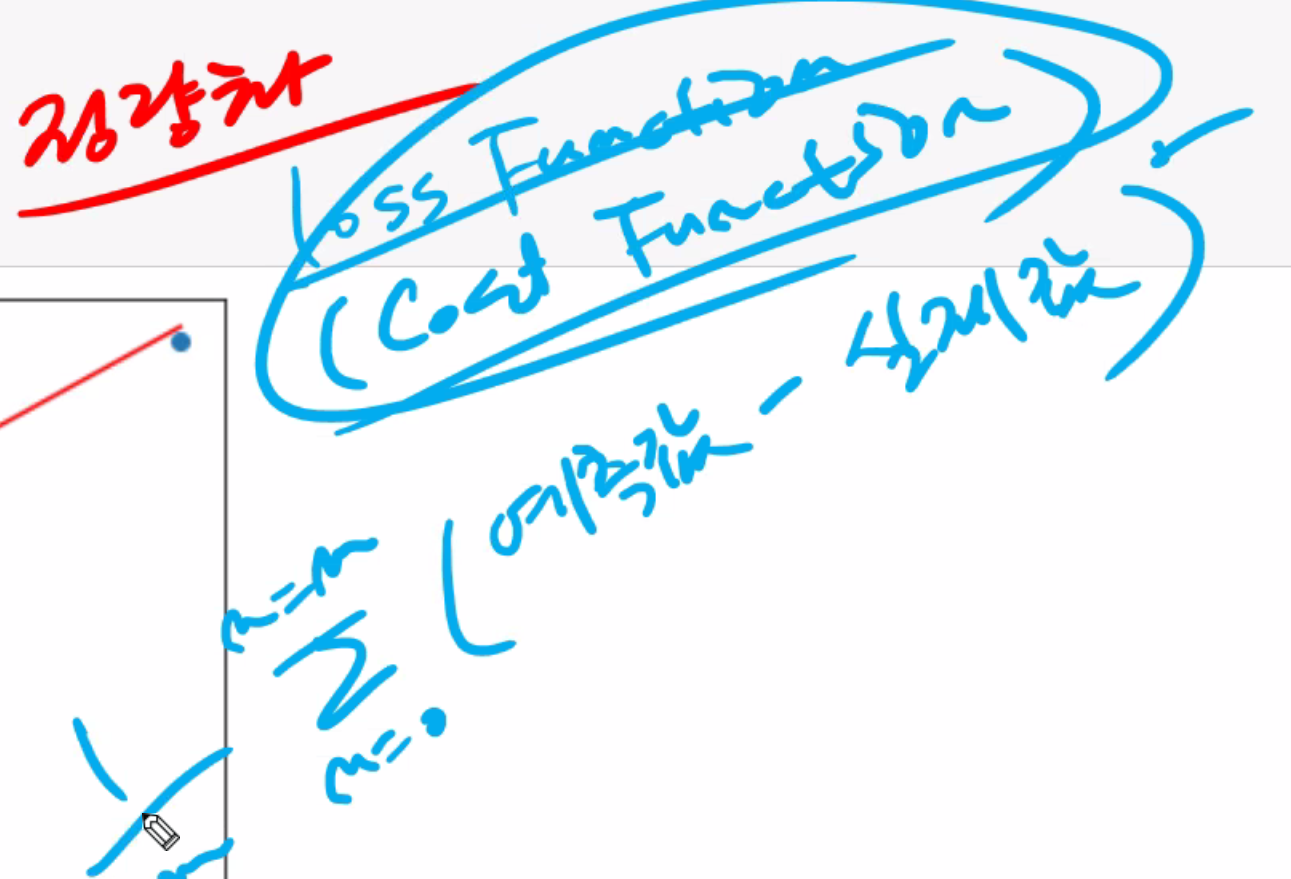

### 평균제곱 오차 
<span style="color:red">
   $$
   \frac{1}{n}\sum(pred_i - y_i)^2
   $$
</span>

#### 평균제곱 오차가 작다는 것은 실제값과 예측값 사이의 간극이 크지 않다는 것을 말한다.
    앞으로 딥러닝과 머신러닝을 공부할때 굉장히 많이 나오는 공식으로 이 값이 작으면 작을수록 예측한값의
    정확도가 높아짐을 의미한다.
#### 선형회귀란 임의의 직선을 그어서 이에 대한 평균제곱 오차를 구하고 이 값을 가장 작게 만들어주는  a와 b값을 찾아가는 작업이다.


In [15]:
# 평균제곱 오차를 구하는 함수 meansquare 를 구현
# 위의 수식과 같은 표현이다.
# y_hat = H(x)를 말한다.
def mse(y_hat, y):
    return ((y_hat - y)**2).mean()


### 정량화

In [17]:
# 0이 될수록 정확한건데, 지금은 8.3이 나왓다.
mse(predict, Y) 

8.299999999999985

### Gradient Descent(경사 하강법)
    이 방법은 내부적으로 미분(편미분(변수가 많을때)) 사용한다.
    목적 : 오차값을 낮춰주는데 목적이 있다. 8.29>>0 에 가깝게 만들어야한다.

In [ ]:
# 0으로 만들려면 경사 하강법(Gradient Descent)을 사용해서 오차를 낮춰줘야 한다.
